source implementation of Capsule Networks by Xifeng Guo

In [1]:
!git clone https://github.com/XifengGuo/CapsNet-Keras.git capsnet-keras

Cloning into 'capsnet-keras'...
remote: Enumerating objects: 227, done.
remote: Total 227 (delta 0), reused 0 (delta 0), pack-reused 227
Receiving objects: 100% (227/227), 1.06 MiB | 2.36 MiB/s, done.
Resolving deltas: 100% (111/111), done.


Importing dependcies

In [2]:
#!git clone https://github.com/XifengGuo/CapsNet-Keras.git capsnet-keras
import os
os.chdir('capsnet-keras')

%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
import keras.backend as K

from capsulelayers import CapsuleLayer, PrimaryCap, Length, Mask
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_yaml
K.set_image_data_format('channels_last')

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Path to dataset in drive

In [0]:
train_dir = '/content/drive/My Drive/data_set/data_train'
test_dir = '/content/drive/My Drive/data_set/data_test'

Mapping class labels from 0 to 4

In [0]:
file_path = []
file_labels = []
for (d,r,f) in os.walk(test_dir):
  
  if(len(r)>0):
    for i in r:
      path = d+"/"+i+"/"
      for file in os.listdir(path):
        p = path + file
        file_path.append(p)
        if(i==str(0)):
          file_labels.append(0)
        if(i==str(2)):
          file_labels.append(1)
        if(i==str(3)):
          file_labels.append(2)
        if(i==str(6)):
          file_labels.append(3)
    
        

In [0]:
file_path = []
file_labels = []
for (d,r,f) in os.walk(train_dir):
  
  if(len(r)>0):
    for i in r:
      path = d+"/"+i+"/"
      for file in os.listdir(path):
        p = path + file
        file_path.append(p)
        if(i==str(0)):
          file_labels.append(0)
        if(i==str(2)):
          file_labels.append(1)
        if(i==str(3)):
          file_labels.append(2)
        if(i==str(6)):
          file_labels.append(3)
    
        

Dataframe to hold image path and label

In [0]:
d = {'path':file_path, 'label':file_labels}
df_train  = pd.DataFrame(data = d)


In [0]:
d = {'path':file_path, 'label':file_labels}
df_test  = pd.DataFrame(data = d)


In [10]:
print(df_train.head())
print(df_test.head())

   label                                               path
0      3  /content/drive/My Drive/data_set/data_train/6/...
1      3  /content/drive/My Drive/data_set/data_train/6/...
2      3  /content/drive/My Drive/data_set/data_train/6/...
3      3  /content/drive/My Drive/data_set/data_train/6/...
4      3  /content/drive/My Drive/data_set/data_train/6/...
   label                                               path
0      1  /content/drive/My Drive/data_set/data_test/2/3...
1      1  /content/drive/My Drive/data_set/data_test/2/3...
2      1  /content/drive/My Drive/data_set/data_test/2/3...
3      1  /content/drive/My Drive/data_set/data_test/2/3...
4      1  /content/drive/My Drive/data_set/data_test/2/3...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


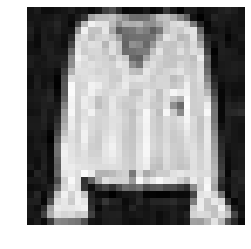

In [11]:
img_name = df_train.iloc[0]['path']

img = imread(img_name, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

For easier data manipulation, we’ll store all our images as numpy arrays

In [12]:
temp = []
i= 0
for img_name in df_train.path:
  #image_path = os.path.join(data_dir, 'train', img_name)
  if(i%500==0):
    print(i)
  i=i+1
  img = imread(img_name, flatten=True)
  img = img.astype('float32')
  temp.append(img)
  
train_x = np.array(temp)
train_x /= 255.0 #normalizing the values
train_x = train_x.reshape(-1, 1024).astype('float32')

temp = [] 



for img_name in df_test.path:
  #image_path = os.path.join(data_dir, 'test', img_name)
  img = imread(img_name, flatten=True)
  img = img.astype('float32')
  temp.append(img)
  
test_x = np.array(temp)
test_x /= 255.0
test_x = test_x.reshape(-1, 1024).astype('float32')
test_y =  keras.utils.np_utils.to_categorical(df_test.label.values)
train_y = keras.utils.np_utils.to_categorical(df_train.label.values)



0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [0]:
#split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x, test_x
train_y, val_y = train_y, test_y

Using Capsulenet as it provides translational and rotational invariance

In [0]:
def CapsNet(input_shape, n_class, routings):
  x = layers.Input(shape=input_shape)
   
   

   # Layer 1: Just a conventional Conv2D layer
  conv1 = layers.Conv2D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv1')(x)

   # Layer 2: Conv2D layer with `squash` activation, then reshape to [None, num_capsule, dim_capsule]
  primarycaps = PrimaryCap(conv1, dim_capsule=8, n_channels=32, kernel_size=9, strides=2, padding='valid')

   # Layer 3: Capsule layer. Routing algorithm works here.
  digitcaps = CapsuleLayer(num_capsule=n_class, dim_capsule=16, routings=routings,
  name='digitcaps')(primarycaps)

   # Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
   # If using tensorflow, this will not be necessary. :)
  out_caps = Length(name='capsnet')(digitcaps)

   # Decoder network.
  y = layers.Input(shape=(n_class,))
  masked_by_y = Mask()([digitcaps, y]) # The true label is used to mask the output of capsule layer. For training
  masked = Mask()(digitcaps) # Mask using the capsule with maximal length. For prediction

   # Shared Decoder model in training and prediction
  decoder = models.Sequential(name='decoder')
  decoder.add(layers.Dense(512, activation='relu', input_dim=16*n_class))
  decoder.add(layers.Dense(1024, activation='relu'))
  decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
  decoder.add(layers.Reshape(target_shape=input_shape, name='out_recon'))

   # Models for training and evaluation (prediction)
  train_model = models.Model([x, y], [out_caps, decoder(masked_by_y)])
  eval_model = models.Model(x, [out_caps, decoder(masked)])

   # manipulate model
  noise = layers.Input(shape=(n_class, 16))
  noised_digitcaps = layers.Add()([digitcaps, noise])
  masked_noised_y = Mask()([noised_digitcaps, y])
  manipulate_model = models.Model([x, y, noise], decoder(masked_noised_y))
  return train_model, eval_model, manipulate_model


def margin_loss(y_true, y_pred):
  L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + 0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))
  return K.mean(K.sum(L, 1))
  
  

  

In [0]:
train_x_temp = train_x.reshape(-1, 32, 32, 1)
val_x_temp = val_x.reshape(-1, 32, 32, 1)

In [16]:
model, eval_model, manipulate_model = CapsNet(input_shape=train_x_temp.shape[1:],
 n_class=len(np.unique(np.argmax(train_y, 1))),
 routings=3)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
dim is deprecated, use axis instead


In [17]:
# compile the model
model.compile(optimizer=optimizers.Adam(lr=0.001),
 loss=[margin_loss, 'mse'],
 loss_weights=[1., 0.392],
 metrics={'capsnet': 'accuracy'})

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 256)  20992       input_1[0][0]                    
__________________________________________________________________________________________________
primarycap_conv2d (Conv2D)      (None, 8, 8, 256)    5308672     conv1[0][0]                      
__________________________________________________________________________________________________
primarycap_reshape (Reshape)    (None, 2048, 8)      0           primarycap_conv2d[0][0]          
__________________________________________________________________________________________________
primarycap

In [19]:
def train_generator(x, y, batch_size, shift_fraction=0.1):
  train_datagen = ImageDataGenerator(width_shift_range=shift_fraction,
  height_shift_range=shift_fraction)
  generator = train_datagen.flow(x, y, batch_size=batch_size)
  while 1:
    x_batch, y_batch = generator.next()
    yield ([x_batch, y_batch], [y_batch, x_batch])
  
 # Training with data augmentation. If shift_fraction=0., also no augmentation.
trained_model3 = model.fit_generator(generator=train_generator(train_x_temp, train_y, 1000, 0.1),
                 steps_per_epoch=int(train_y.shape[0] / 1000),
                 epochs=500)

Epoch 1/500
6/6 [==============================] - 21s 4s/step - loss: 0.1899 - capsnet_loss: 0.1841 - decoder_loss: 0.0149 - capsnet_acc: 0.7087
Epoch 2/500
6/6 [==============================] - 18s 3s/step - loss: 0.1898 - capsnet_loss: 0.1839 - decoder_loss: 0.0149 - capsnet_acc: 0.7116
Epoch 3/500
6/6 [==============================] - 18s 3s/step - loss: 0.1904 - capsnet_loss: 0.1845 - decoder_loss: 0.0151 - capsnet_acc: 0.7116
Epoch 4/500
6/6 [==============================] - 19s 3s/step - loss: 0.1874 - capsnet_loss: 0.1814 - decoder_loss: 0.0153 - capsnet_acc: 0.7207
Epoch 5/500
6/6 [==============================] - 18s 3s/step - loss: 0.1919 - capsnet_loss: 0.1858 - decoder_loss: 0.0156 - capsnet_acc: 0.7110
Epoch 6/500
6/6 [==============================] - 18s 3s/step - loss: 0.1912 - capsnet_loss: 0.1852 - decoder_loss: 0.0154 - capsnet_acc: 0.7101
Epoch 7/500
6/6 [==============================] - 18s 3s/step - loss: 0.1861 - capsnet_loss: 0.1800 - decoder_loss: 0.0156 

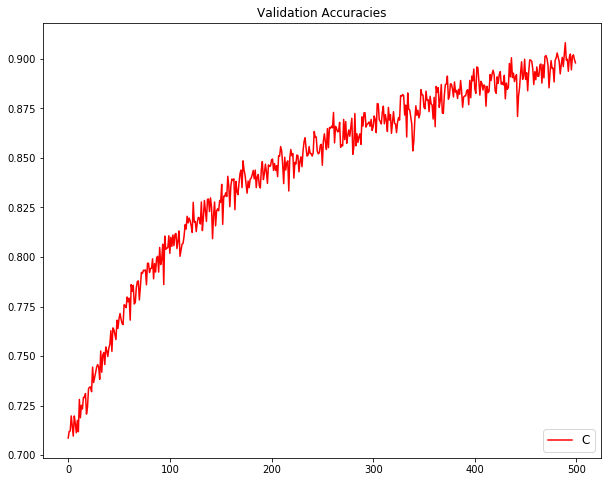

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(trained_model3.history['capsnet_acc'], 'r')
plt.legend(('CapsNet'),
 loc='lower right', fontsize='large')
plt.title('Validation Accuracies')
plt.show()

In [0]:
model_yaml = model.to_yaml()
with open("/content/drive/My Drive/model_capsnet.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model_capsnet_weight.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
test_path = '/content/drive/My Drive/test_resize'

In [0]:
temp = []
i= 0
for name in os.listdir(test_path):
  #image_path = os.path.join(data_dir, 'train', img_name)
  if(i%500==0):
    print(i)
  i=i+1
  img_name = test_path+'/'+name
  img = imread(img_name, flatten=True)
  img = img.astype('float32')
  temp.append(img)
  
final_test = np.array(temp)
final_test /= 255.0
final_test = final_test.reshape(-1, 1024).astype('float32')



0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


500
1000
1500


In [53]:
index = []
label = []
d = dict()
c= 0
for i in os.listdir(test_path):
  s = i.split('.')
  s = int(s[0])
  img_name = test_path+'/'+i
  img = imread(img_name, flatten=True)
  img = img.astype('float32')
  
  #img /= 255.0
  img = np.array(img)
  
  img = img.reshape(-1, 32,32,1).astype('float32')
  #print(img.shape)
  y_pred, x_recon = eval_model.predict(img)
  #print(y_pred)
  p = np.argmax(y_pred)
  if(p==0): #mapping predicted values back to original classes
    p=0
  elif(p==1):
    p =2
  elif(p==2):
    p=3
  elif(p==3):
    p=6
  else:
    print(p)
    break
  c=c+1
  label.append(p)
  index.append(s)
  #print(p)
  if(c%200==0):
    print(c)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


200
400
600
800
1000
1200
1400
1600
1800
2000


In [0]:
d = {'image_index':index, 'class':label}
df_result = pd.DataFrame(data = d)

In [0]:
file = '/content/drive/My Drive/result.csv'

In [69]:
df.head()

,image_index,class
1000,0,2
1002,1,6
113,2,2
221,3,2
334,4,2


In [0]:
df_result = df_result.set_index('image_index')

In [0]:
df = df_result[['image_index', 'class']]

In [0]:
df = df.sort_values(by='image_index', ascending=True)

In [0]:
df.to_csv(file)